In [1]:
#!pip install pydub
#!pip3 install pyaudio
#!pip3 install librosa

In [2]:
import librosa
import librosa.display
import matplotlib.pyplot as plt
import numpy as np
import soundfile as sf    
from pydub import AudioSegment   
import time    
from pydub.playback import play      
import keras   

In [3]:
t1 = time.time()
flac_file = '../0001-1000-audio-mix/0001_mix.flac'
audio, sr = sf.read(flac_file)
sf.write('../0001-1000-audio-mix/0001_mix.wav', audio, sr, 'PCM_16')
t2 = time.time()
print(t2-t1)


0.3020212650299072


In [4]:
folder_number = "0001-1000"
file_number = "0001"

audio_path = '../0001-1000-audio-mix/0001_mix.wav'
y2, sr = librosa.load(audio_path)                              

In [5]:
len(y2)

2705997

In [6]:
#play(data)

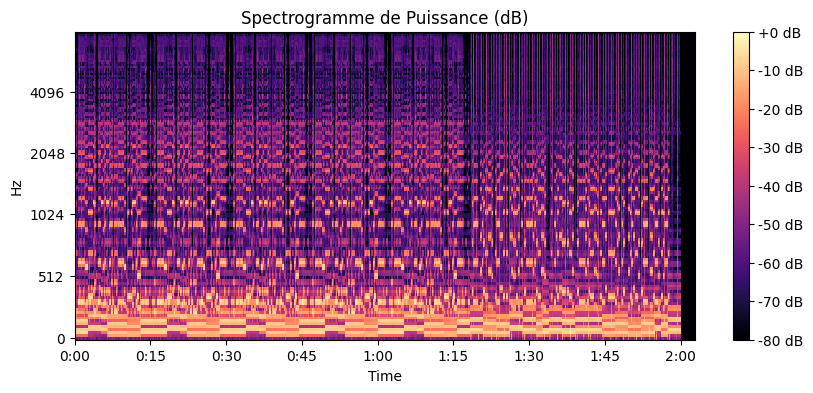

In [7]:
# Extraire le spectre de puissance (puissance des fréquences) au fil du temps
power = librosa.feature.melspectrogram(y=y2, sr=sr)

# Convertir le spectre de puissance en décibels (dB)
power_db = librosa.power_to_db(power, ref=np.max)

# Afficher le spectrogramme de puissance en dB
plt.figure(figsize=(10, 4))
librosa.display.specshow(power_db, x_axis='time', y_axis='mel', sr=sr, fmax=8000)
plt.colorbar(format='%+2.0f dB')
plt.title('Spectrogramme de Puissance (dB)')
plt.show()

94


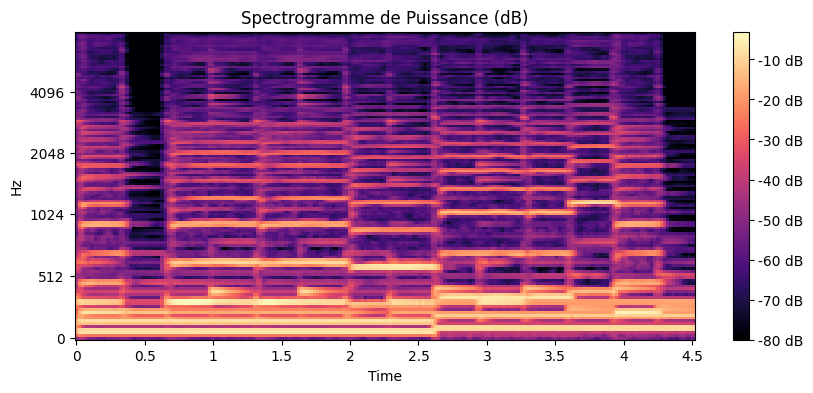

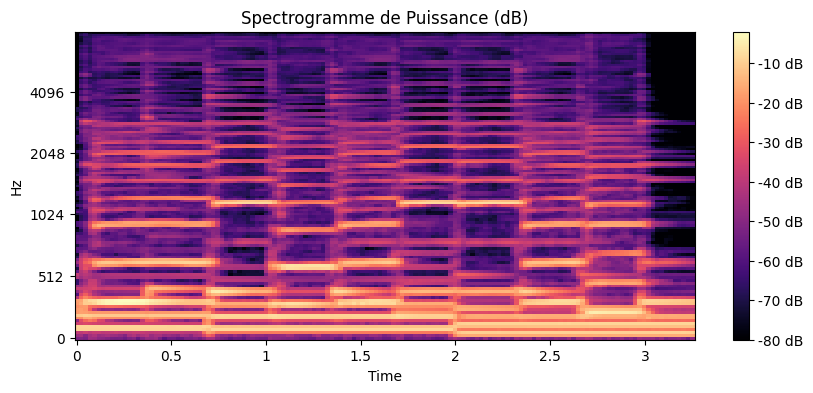

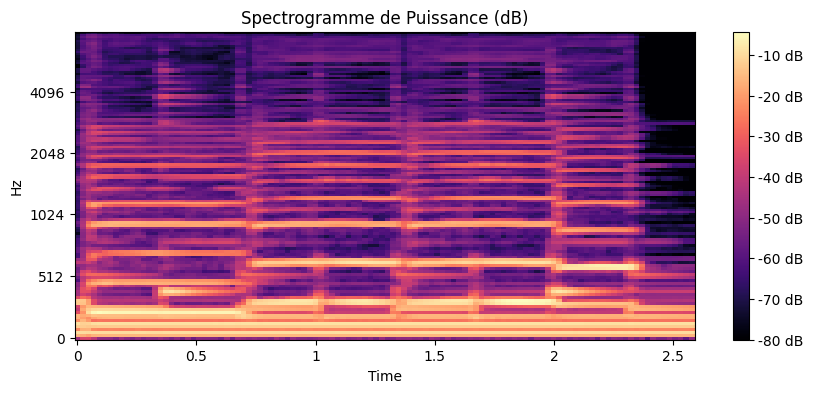

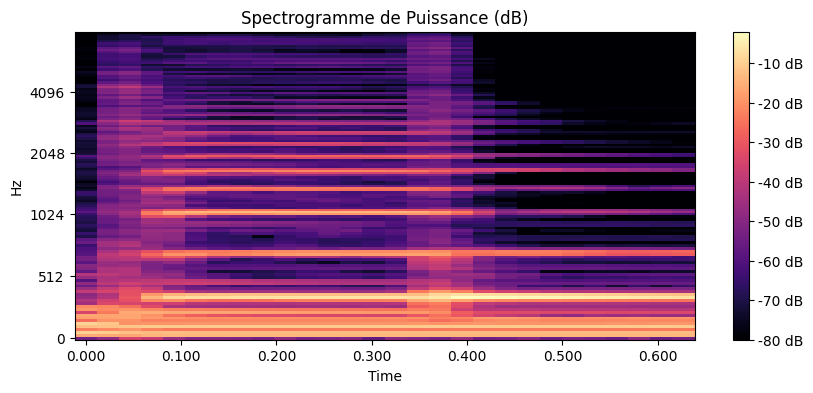

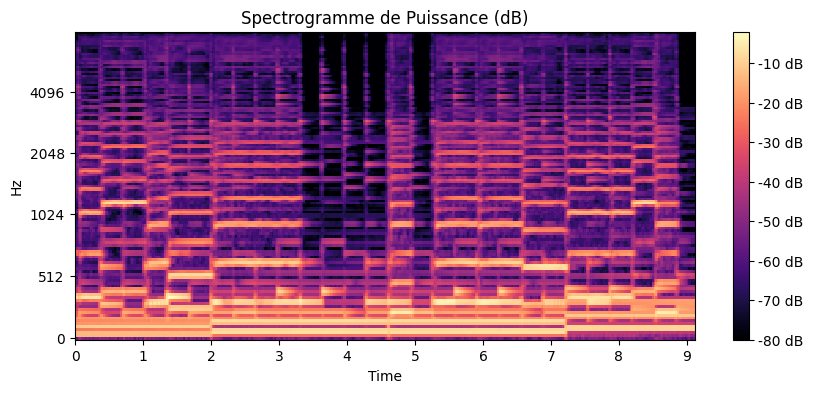

In [8]:
threshold_db = 10  # ajuster ce seuil en fonction de nos besoins
significant_changes = np.where(np.diff(power_db.mean(axis=0)) > threshold_db)[0]

# Diviser le spectrogramme en morceaux
segments = []
start_idx = 0

for change_point in significant_changes:
    segment = power_db[:, start_idx:change_point]


    segments.append(segment)
    start_idx = change_point

# Ajouter le dernier segment
last_segment = power_db[:, start_idx:]
segments.append(last_segment)
print(len(segments))

for i in range(5):
    plt.figure(figsize=(10, 4))
    librosa.display.specshow(segments[i], x_axis='time', y_axis='mel', sr=sr, fmax=8000)
    plt.colorbar(format='%+2.0f dB')
    plt.title('Spectrogramme de Puissance (dB)')
    plt.show()